# Import data files from competitions for research on local device

In [2]:
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 5.12MB/s]


In [3]:
#extracting zip file contents to specific directory 
# library for working with zip files
import zipfile
# open zip file
file = open('titanic.zip', 'rb')
z = zipfile.ZipFile(file)
# check what we have in zip
#print(z.namelist())
for name in z.namelist():
    outpath = "/Users/marigaldina/projects/kaggle_titanic/data/"
    z.extract(name, outpath)
file.close()

## About the Data:

**survival**: Survival
* 0 = No
* 1 = Yes
**pclass**: A proxy for socio-economic status (SES)
* 1 = 1st (Upper)
* 2 = 2nd (Middle)
* 3 = 3rd (Lower)
**sex**: Sex
**age**: Age in years. Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5\
**sibsp**: number of siblings / spouses aboard the Titanic. The dataset defines family relations in this way:\
**Sibling** = brother, sister, stepbrother, stepsister
**Spouse** = husband, wife (mistresses and fiancés were ignored)
**parch:** # of parents / children aboard the Titanic. The dataset defines family relations in this way:
**Parent** = mother, father
**Child** = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.
**ticket:** Ticket number
**fare:** Passenger fare
**cabin:** Cabin number
**embarked:** Port of Embarkation
* C = Cherbourg
* Q = Queenstown
* S = Southampton

In [13]:
# import nessesary libraries
# for worknig with data
import numpy as np 
import pandas as pd 
# fro visualisation
import seaborn as sns 
import matplotlib.pyplot as plt

In [201]:
# read train.csv dataset into Randas data Frame df
df = pd.read_csv('./data/train.csv')

In [202]:
#check what we have
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


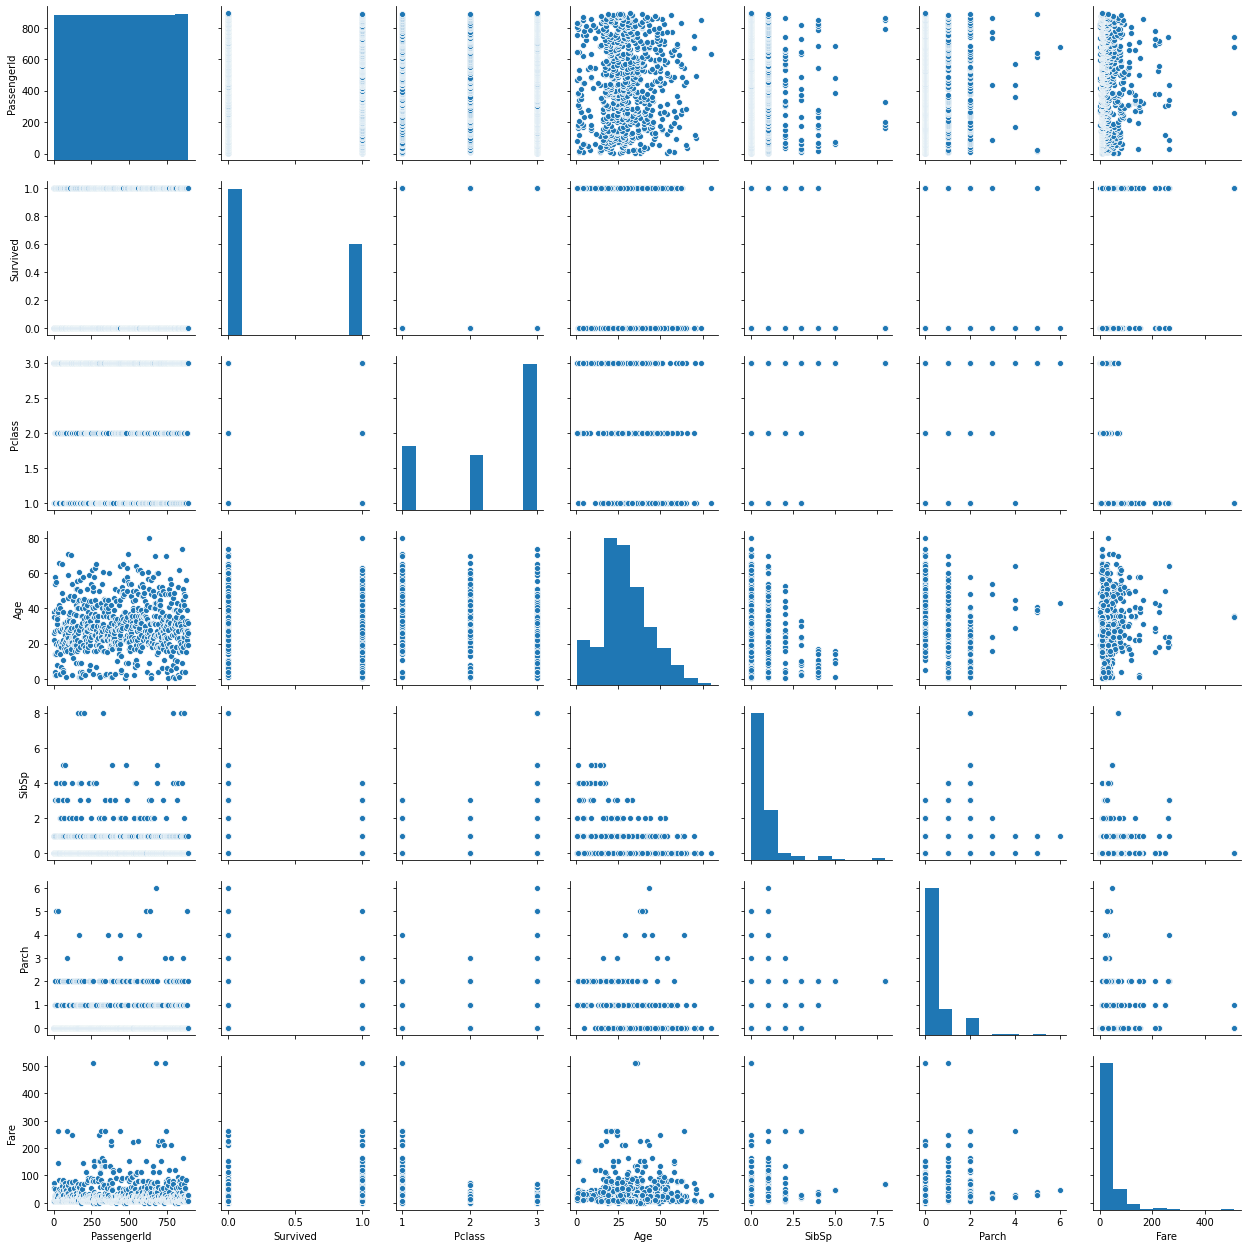

In [204]:
sns.pairplot(data=df)

In [11]:
# check some statistical information
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# for faster work with columns
df.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# how we can see we have numeric and categorical columns.
# 

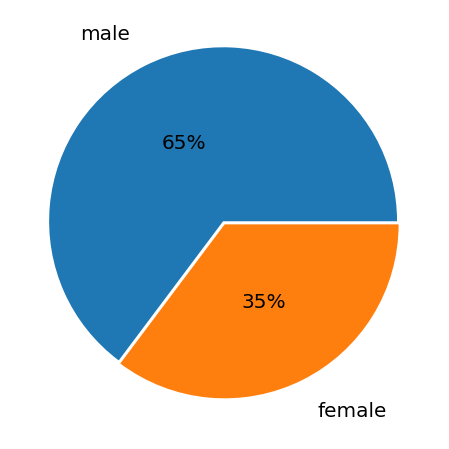

In [70]:
plt.figure(figsize=(5,5))
# kind = 'pie' ~ Pie Chart
# figsize=(8,8) ~ we can cahnge size of all figure
# explode=[0.02,0] ~ white line between two pieces of our pie, if we increase number 0.02 piece of pie "fly away" from chart
# autopct='%.0f%%'  ~ how we see numbers on the chart
# 
df.Sex.value_counts().plot(kind = 'pie', figsize=(8,8), explode=[0.02,0],autopct='%.0f%%',fontsize=20, pctdistance=0.5, labeldistance=1.2, label='')

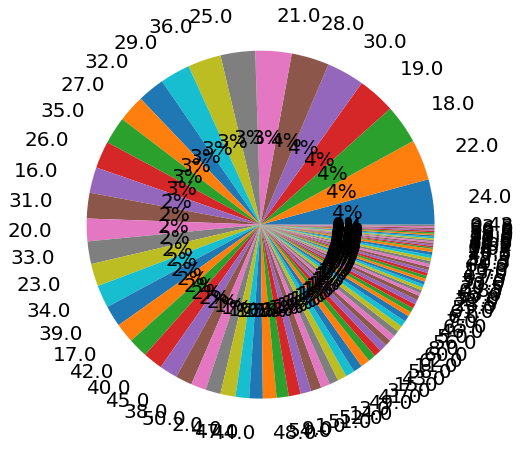

In [72]:
df.Age.value_counts().plot(kind = 'pie', figsize=(8,8),autopct='%.0f%%',fontsize=20, pctdistance=0.5, labeldistance=1.2, label='')

In [74]:
# from name columns we can find a prefix
# Library to work with Regular Expressions
import re
df['prefix'] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

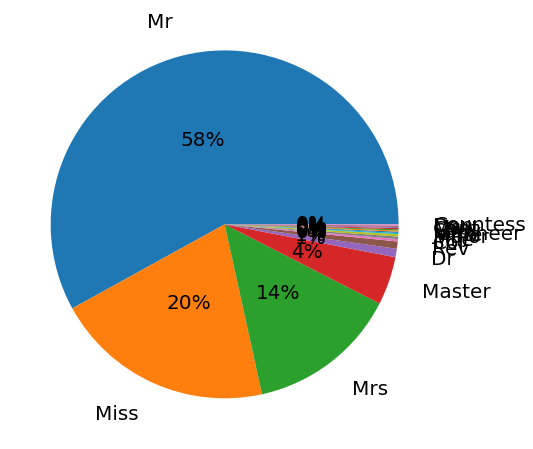

In [77]:
df.prefix.value_counts().plot(kind = 'pie', figsize=(8,8),autopct='%.0f%%',fontsize=20, pctdistance=0.5, labeldistance=1.2, label='')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

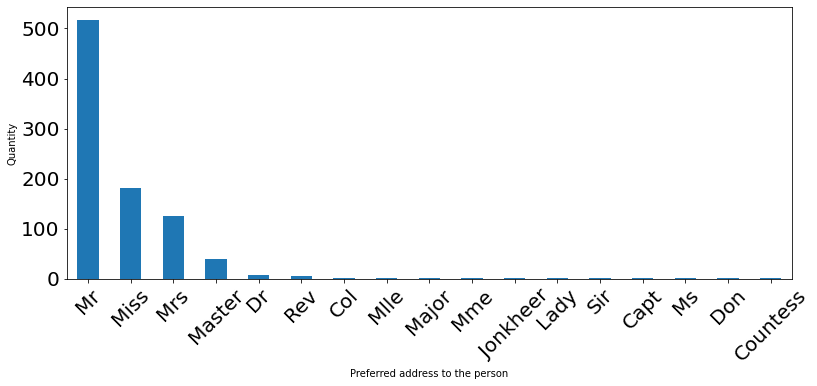

In [88]:
df.prefix.value_counts().plot(kind = 'bar', figsize=(13,5),fontsize=20)
plt.ylabel('Quantity')
plt.xlabel("Preferred address to the person")
plt.xticks(rotation=45)

In [205]:
#Do the same to test dataset 
interval = (0, 5, 12, 18, 25, 35, 60, 120)

#same as the other df train
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

# same that we used above in df train
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young


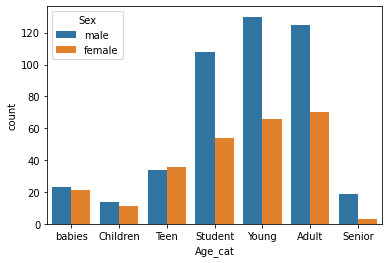

In [226]:
sns.countplot("Age_cat",data=df,hue="Sex")

In [219]:
gb_df=pd.pivot_table(df, index=['Age_cat','Sex'], values='PassengerId',aggfunc=len)
gb_df.info()
gb_df.reset_index(inplace=True)
gb_df.set_index("Age_cat", inplace = True)
gb_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 14 entries, (babies, female) to (Senior, male)
Data columns (total 1 columns):
PassengerId    14 non-null int64
dtypes: int64(1)
memory usage: 695.0+ bytes
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 14 entries, babies to Senior
Data columns (total 2 columns):
Sex            14 non-null object
PassengerId    14 non-null int64
dtypes: int64(1), object(1)
memory usage: 614.0+ bytes


In [220]:
# separate the different groups to be plotted
x_male = gb_df[gb_df["Sex"] == "male"]['PassengerId']
#x_male.drop('Sex', axis=1, inplace=True)
x_male

Age_cat
babies       23
Children     14
Teen         34
Student     108
Young       130
Adult       125
Senior       19
Name: PassengerId, dtype: int64

In [221]:
x_female = -gb_df[gb_df["Sex"] == "female"]['PassengerId']

#x_female.drop('Sex', axis=1, inplace=True)
x_female

Age_cat
babies     -21
Children   -11
Teen       -36
Student    -54
Young      -66
Adult      -70
Senior      -3
Name: PassengerId, dtype: int64

In [214]:
# Useful for:
# The population chart is a type of funnel chart.
# It really helps out to see the gain/loss of certain amount at every stage in a process.

# More info: 
# https://en.wikipedia.org/wiki/Population_pyramid

# ----------------------------------------------------------------------------------------------------
# get the data
PATH = './data/email_campaign_funnel.csv'
df1 = pd.read_csv(PATH)

# ----------------------------------------------------------------------------------------------------
# prepare the data for plotting
gb_df1 = df1.groupby(["Stage", "Gender"])["Users"].sum().to_frame().reset_index()
gb_df1.set_index("Stage", inplace = True)
gb_df1
# separate the different groups to be plotted
x_male1 = gb_df1[gb_df1["Gender"] == "Male"]["Users"]
x_male1

Stage
Stage 01: Browsers                       -1.492762e+07
Stage 02: Unbounced Users                -1.286266e+07
Stage 03: Email Signups                  -1.136190e+07
Stage 04: Email Confirmed                -9.411708e+06
Stage 05: Campaign-Email Opens           -8.074317e+06
Stage 06: Campaign-Email Clickthroughs   -6.958512e+06
Stage 07: Buy Button Page                -6.045363e+06
Stage 08: Buy Button Clickers            -5.029954e+06
Stage 09: Cart Confirmation Page         -4.008034e+06
Stage 10: Address Verification Page      -3.172555e+06
Stage 11: Submit Order Page              -2.484808e+06
Stage 12: Payment                        -1.903727e+06
Stage 13: Payment Successful             -1.490277e+06
Stage 14: 1st Successful Purchase        -1.152004e+06
Stage 15: 2nd Purchase                   -7.707481e+05
Stage 16: 3rd Purchase                   -4.344300e+05
Stage 17: 4th Purchase                   -1.950319e+05
Stage 18: 5th Purchase                   -7.034079e+04
Name

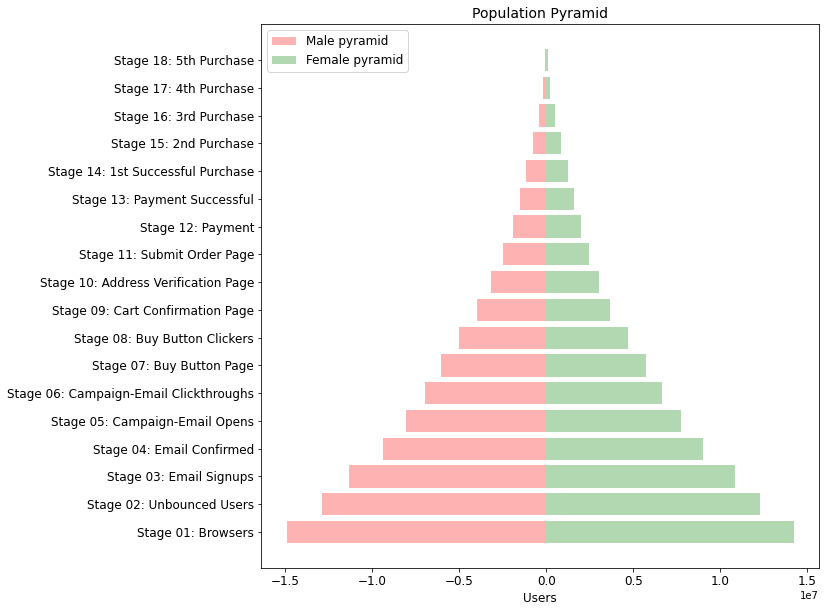

In [216]:
# separate the different groups to be plotted
x_male1 = gb_df1[gb_df1["Gender"] == "Male"]["Users"]
x_male1
x_female1= gb_df1[gb_df1["Gender"] == "Female"]["Users"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.barh(x_male1.index, x_male1, color = "red", alpha = 0.3, label = "Male pyramid")
ax.barh(x_female1.index, x_female1, color = "green", alpha = 0.3, label = "Female pyramid")

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add the legend to a specific location
ax.legend(loc = "upper left", fontsize = 12)
# set xlabel
ax.set_xlabel("Users", fontsize = 12)
# set the title for the plot
ax.set_title("Population Pyramid", fontsize = 14)
# change the x and y ticks to a smaller size
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)

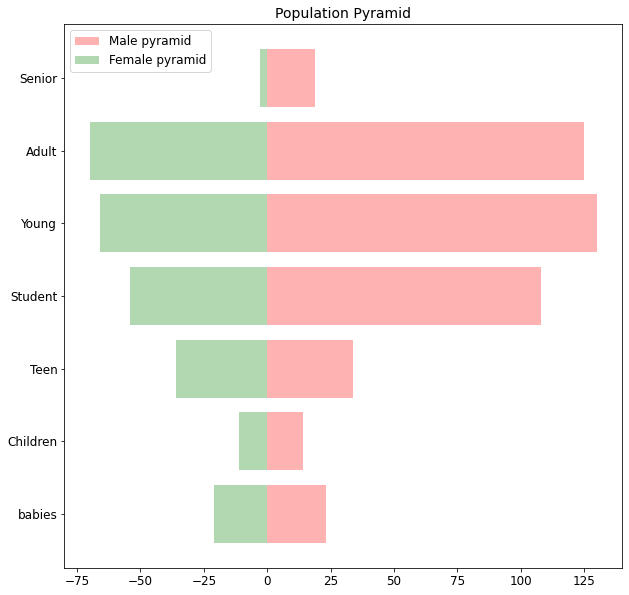

In [223]:
# instanciate the figure
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.barh(x_male.index, x_male, color = "red", alpha = 0.3, label = "Male pyramid")
ax.barh(x_female.index, x_female, color = "green", alpha = 0.3, label = "Female pyramid")

# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add the legend to a specific location
ax.legend(loc = "upper left", fontsize = 12)
# set xlabel
ax.set_xlabel("", fontsize = 12)
# set the title for the plot
ax.set_title("Population Pyramid", fontsize = 14)
# change the x and y ticks to a smaller size
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)

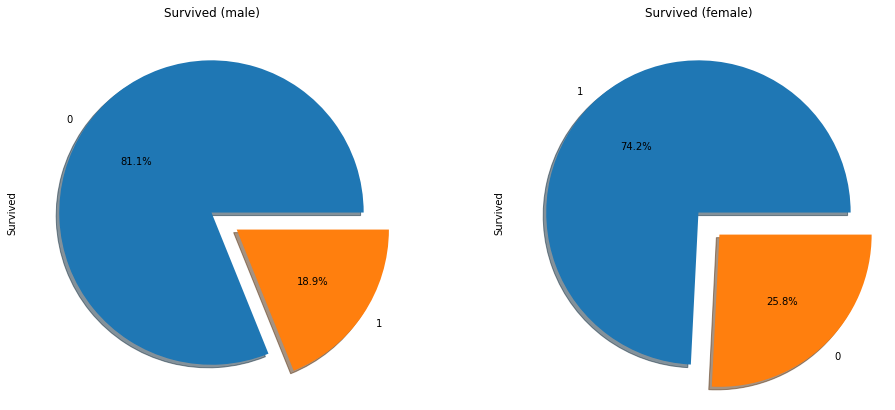

In [64]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()